In [1]:
df<-read.csv('d:/data/university/data.csv')
head(df)

quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,class
7,9,1,1,1,1,5,100.00,1
9,17,3,12,4,4,1,91.67,1
17,11,5,4,2,2,15,89.50,1
10,24,4,16,16,11,50,86.17,1
2,29,7,37,22,22,18,85.21,1
8,14,2,53,33,26,101,82.50,1


In [2]:
library(dplyr)
df<-df %>% select(-score)
dim(df)
head(df)

Warning message:
"package 'dplyr' was built under R version 3.6.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



[1] 2200    8

quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,class
7,9,1,1,1,1,5,1
9,17,3,12,4,4,1,1
17,11,5,4,2,2,15,1
10,24,4,16,16,11,50,1
2,29,7,37,22,22,18,1
8,14,2,53,33,26,101,1



   0    1 
1686  514 

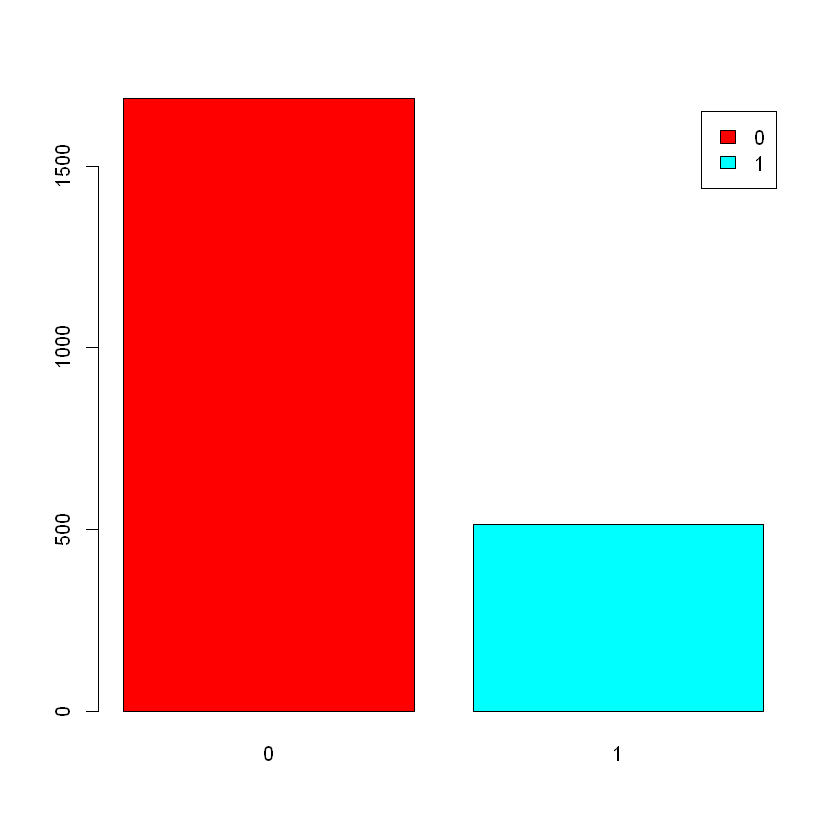

In [3]:
(tbl<-table(df$class))
barplot(tbl,beside=T,legend=T, col=rainbow(2))

In [4]:
library(ROSE)
df_samp<-ovun.sample(class ~., data=df, seed=1, method='under',
                     N=514*2)$data
(tbl<-table(df_samp$class))

Warning message:
"package 'ROSE' was built under R version 3.6.2"Loaded ROSE 0.0-3




  0   1 
514 514 

In [ ]:
library(ROSE)
df_samp<-ovun.sample(class ~., data=df, seed=1, method='over',
                     N=1686*2)$data
(tbl<-table(df_samp$class))

In [5]:
library(caret)
set.seed(123)
idx_train<-createDataPartition(y=df_samp$class, p=0.8, list=F)
train <- df_samp[idx_train,]
X_train <- train[,-8]
y_train <- train[,8]
test<-df_samp[-idx_train,]
X_test<-test[,-8]
y_test<-test[,8]

Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.2"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.2"

In [6]:
#로지스틱 회귀분석 모형
model<-glm(class ~ . , data=train, family=binomial)
summary(model)


Call:
glm(formula = class ~ ., family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7718  -0.1684   0.0465   0.3294   3.5053  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           5.0110200  0.4461676  11.231  < 2e-16 ***
quality_of_education -0.0010198  0.0014579  -0.699 0.484269    
alumni_employment    -0.0030271  0.0007786  -3.888 0.000101 ***
quality_of_faculty   -0.0048705  0.0028542  -1.706 0.087929 .  
publications         -0.0040763  0.0014359  -2.839 0.004526 ** 
influence            -0.0028432  0.0014376  -1.978 0.047951 *  
citations            -0.0036300  0.0014259  -2.546 0.010902 *  
patents              -0.0007749  0.0006340  -1.222 0.221651    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1142.31  on 823  degrees of freedom
Residual deviance:  373.06  on 816  degrees of fr

In [7]:
#후진제거법
reduced<-step(model,direction='backward')

Start:  AIC=389.06
class ~ quality_of_education + alumni_employment + quality_of_faculty + 
    publications + influence + citations + patents

                       Df Deviance    AIC
- quality_of_education  1   373.55 387.55
- patents               1   374.54 388.54
<none>                      373.06 389.06
- quality_of_faculty    1   376.02 390.02
- influence             1   377.08 391.08
- citations             1   380.24 394.24
- publications          1   381.44 395.44
- alumni_employment     1   388.41 402.41

Step:  AIC=387.55
class ~ alumni_employment + quality_of_faculty + publications + 
    influence + citations + patents

                     Df Deviance    AIC
- patents             1   374.95 386.95
<none>                    373.55 387.55
- influence           1   378.38 390.38
- quality_of_faculty  1   379.84 391.84
- citations           1   380.63 392.63
- publications        1   381.72 393.72
- alumni_employment   1   391.07 403.07

Step:  AIC=386.95
class ~ alumni_emp

In [8]:
library(e1071)
set.seed(123)
tune.out<-tune(svm,class ~alumni_employment + quality_of_faculty + publications + 
    influence + citations, data=train,
              range=list(cost=c(0.001,0.01,0.1,1,10),
                        gamma=c(0.0001,0.001,0.01,0.1)))
summary(tune.out)
#최적의 파라미터 : cost 10 gamma 0.1

Warning message:
"package 'e1071' was built under R version 3.6.2"


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
   10   0.1

- best performance: 0.05518016 

- Detailed performance results:
    cost gamma      error dispersion
1  1e-03 1e-04 0.49665128 0.03182491
2  1e-02 1e-04 0.49155261 0.03159146
3  1e-01 1e-04 0.44235159 0.02940645
4  1e+00 1e-04 0.12891695 0.01496512
5  1e+01 1e-04 0.08407332 0.02257087
6  1e-03 1e-03 0.49163042 0.03159330
7  1e-02 1e-03 0.44307873 0.02942094
8  1e-01 1e-03 0.13110008 0.01509795
9  1e+00 1e-03 0.08366325 0.02260087
10 1e+01 1e-03 0.08509260 0.02469118
11 1e-03 1e-02 0.44970741 0.02957395
12 1e-02 1e-02 0.15473095 0.01635502
13 1e-01 1e-02 0.08004751 0.02272030
14 1e+00 1e-02 0.07064973 0.02416098
15 1e+01 1e-02 0.06458532 0.02500581
16 1e-03 1e-01 0.34219032 0.02294132
17 1e-02 1e-01 0.07236200 0.02374968
18 1e-01 1e-01 0.06420042 0.02757458
19 1e+00 1e-01 0.05926428 0.02777429
20 1e+01 1e-01 0.05518016 0.02694054


In [9]:
bestmodel<-tune.out$best.model
summary(bestmodel)


Call:
best.tune(method = svm, train.x = class ~ alumni_employment + quality_of_faculty + 
    publications + influence + citations, data = train, ranges = list(cost = c(0.001, 
    0.01, 0.1, 1, 10), gamma = c(1e-04, 0.001, 0.01, 0.1)))


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  10 
      gamma:  0.1 
    epsilon:  0.1 


Number of Support Vectors:  304






In [10]:
pred<-predict(bestmodel,X_train)
result<-round(pred)
table(y_train,result)
mean(y_train==result)

       result
y_train   0   1
      0 371  41
      1  12 400

[1] 0.9356796

In [11]:
pred<-predict(bestmodel,X_test)
result<-round(pred)
table(y_test,result)
mean(y_test==result)

      result
y_test   0   1
     0  91  11
     1   2 100

[1] 0.9362745

In [14]:
library(party)
set.seed(123)
model<-ctree(class ~., data=train) #의사결정나무 모형
model


	 Conditional inference tree with 12 terminal nodes

Response:  class 
Inputs:  quality_of_education, alumni_employment, quality_of_faculty, publications, influence, citations, patents 
Number of observations:  824 

1) citations <= 220; criterion = 1, statistic = 495.261
  2) publications <= 195; criterion = 1, statistic = 67.567
    3) publications <= 100; criterion = 0.993, statistic = 10.696
      4)*  weights = 259 
    3) publications > 100
      5)*  weights = 108 
  2) publications > 195
    6) citations <= 115; criterion = 0.99, statistic = 10.136
      7)*  weights = 13 
    6) citations > 115
      8) patents <= 128; criterion = 0.963, statistic = 7.748
        9)*  weights = 8 
      8) patents > 128
        10) alumni_employment <= 124; criterion = 0.981, statistic = 8.949
          11)*  weights = 7 
        10) alumni_employment > 124
          12)*  weights = 21 
1) citations > 220
  13) quality_of_education <= 98; criterion = 1, statistic = 93.4
    14) influence <= 3

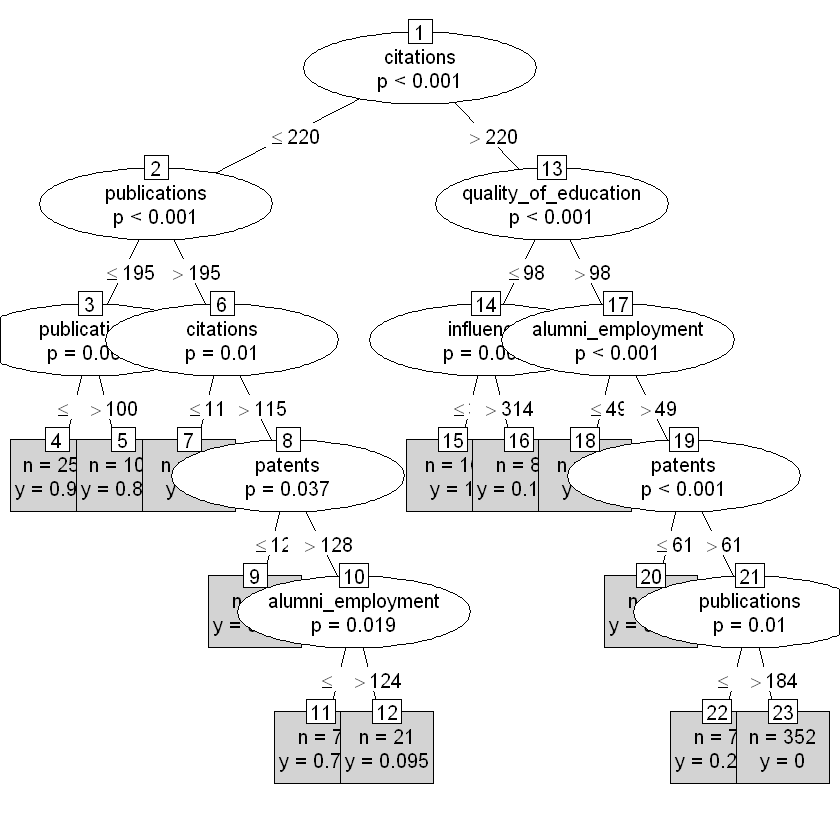

In [15]:
plot(model,type='simple')